<a href="https://colab.research.google.com/github/hhpramod/Weather-Classification/blob/main/Weather_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Weather Classification**

In [3]:
# Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Import dataset
wc = pd.read_csv("/content/drive/MyDrive/Project_Dataset/weather_classification_data.csv")
wc.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [5]:
# Get the variables information
wc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [6]:
# Check the duplicates
wc.duplicated().sum()

0

In [7]:
# drop the unnecessary variables
wc.drop(columns =['Precipitation (%)','UV Index','Visibility (km)'], inplace = True)

<ipython-input-8-9b46cd9a5823>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=wc, x='Weather Type', palette='viridis')


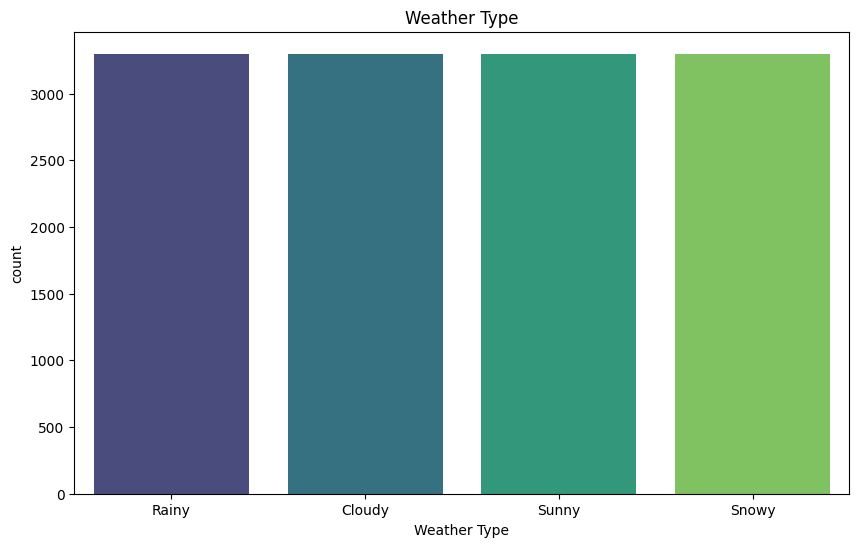

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(data=wc, x='Weather Type', palette='viridis')
plt.title('Weather Type')
plt.xlabel('Weather Type')
plt.show()

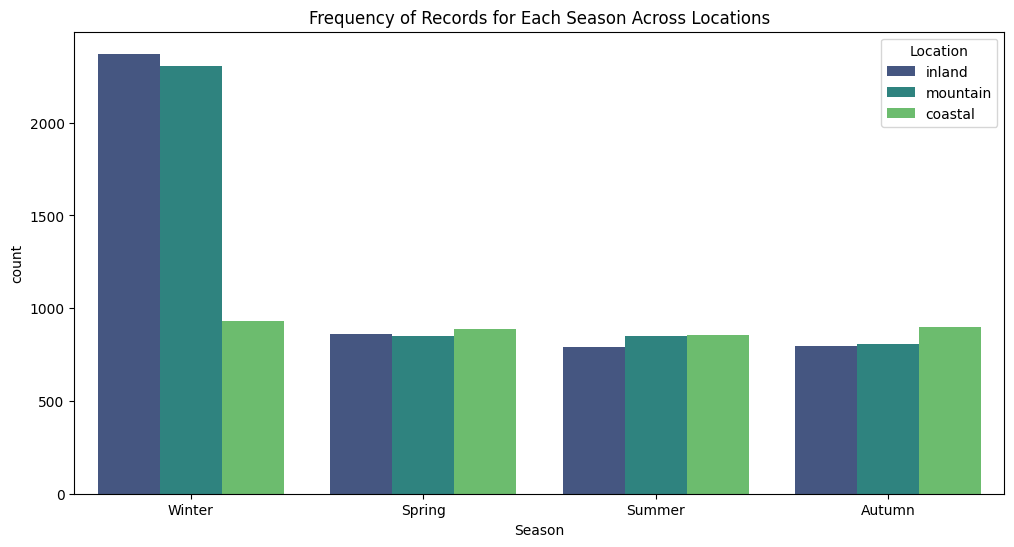

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(data=wc, x='Season', hue='Location', palette='viridis')
plt.title('Frequency of Records for Each Season Across Locations')
plt.xlabel('Season')
plt.legend(title='Location')
plt.show()


<ipython-input-10-d119a0d0974d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=wc, x='Cloud Cover', palette='viridis')


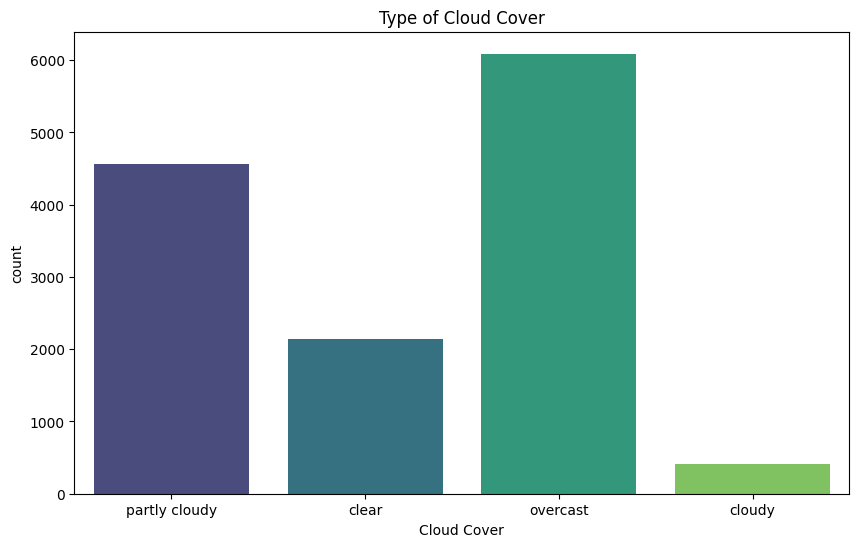

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=wc, x='Cloud Cover', palette='viridis')
plt.title('Type of Cloud Cover')
plt.xlabel('Cloud Cover')
plt.show()

**Outlier Detection**

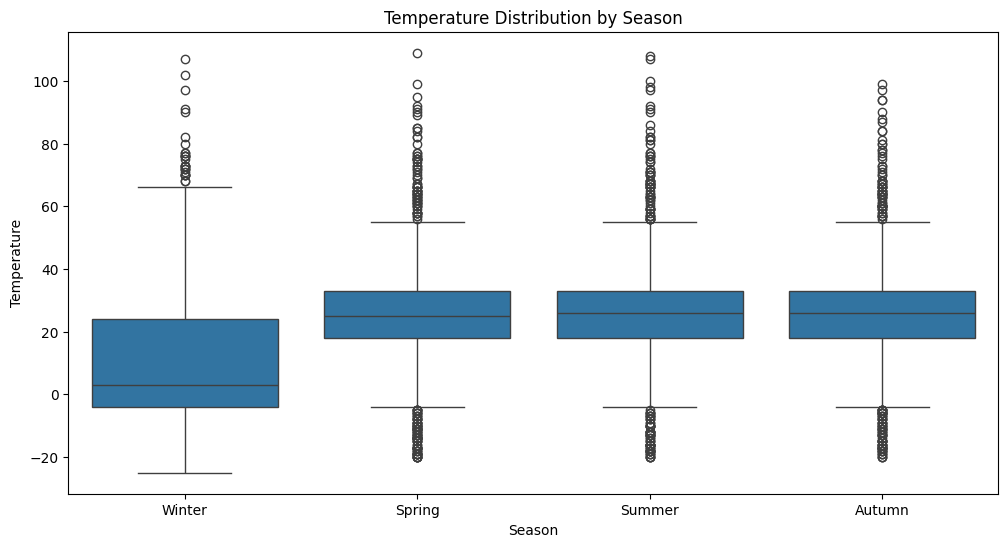

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Season', y='Temperature', data=wc)
plt.title('Temperature Distribution by Season')
plt.show()

<Axes: ylabel='Atmospheric Pressure'>

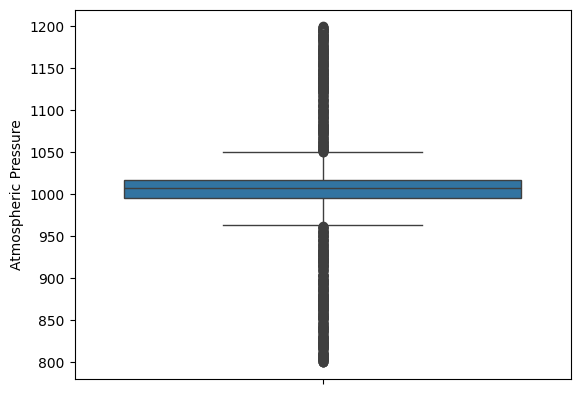

In [12]:
# We can identify the outliers of Atmospheric Pressure variable
new_var = sns.boxplot(wc['Atmospheric Pressure'])
new_var

In [13]:
# To remove the outliers, I used IQR Method

percentile25 = wc['Atmospheric Pressure'].quantile(0.25)
print('25th percentile :',percentile25)

percentile75 = wc['Atmospheric Pressure'].quantile(0.75)
print('75th percentile :',percentile75)

IQR = percentile75-percentile25
print('IQR :',IQR)

upper_limit = percentile75 + 1.5*IQR
print('Upper limit :',upper_limit)

lower_limit = percentile25 - 1.5*IQR
print('Lower limit :',lower_limit)

# Create a copy of the DataFrame
new_df = wc.copy()

# Capping the outliers
new_df['Atmospheric Pressure'] = np.where(
    new_df['Atmospheric Pressure'] > upper_limit, upper_limit,
    np.where(new_df['Atmospheric Pressure'] < lower_limit, lower_limit, new_df['Atmospheric Pressure'])
)

print(new_df.head())

25th percentile : 994.8
75th percentile : 1016.7725
IQR : 21.972500000000082
Upper limit : 1049.7312500000003
Lower limit : 961.8412499999998
   Temperature  Humidity  Wind Speed    Cloud Cover  Atmospheric Pressure  \
0         14.0        73         9.5  partly cloudy               1010.82   
1         39.0        96         8.5  partly cloudy               1011.43   
2         30.0        64         7.0          clear               1018.72   
3         38.0        83         1.5          clear               1026.25   
4         27.0        74        17.0       overcast                990.67   

   Season  Location Weather Type  
0  Winter    inland        Rainy  
1  Spring    inland       Cloudy  
2  Spring  mountain        Sunny  
3  Spring   coastal        Sunny  
4  Winter  mountain        Rainy  


In [14]:
df = new_df.copy()
df.head()

,Temperature,Humidity,Wind Speed,Cloud Cover,Atmospheric Pressure,Season,Location,Weather Type
0,14.0,73,9.5,partly cloudy,1010.82,Winter,inland,Rainy
1,39.0,96,8.5,partly cloudy,1011.43,Spring,inland,Cloudy
2,30.0,64,7.0,clear,1018.72,Spring,mountain,Sunny
3,38.0,83,1.5,clear,1026.25,Spring,coastal,Sunny
4,27.0,74,17.0,overcast,990.67,Winter,mountain,Rainy


<Axes: ylabel='Atmospheric Pressure'>

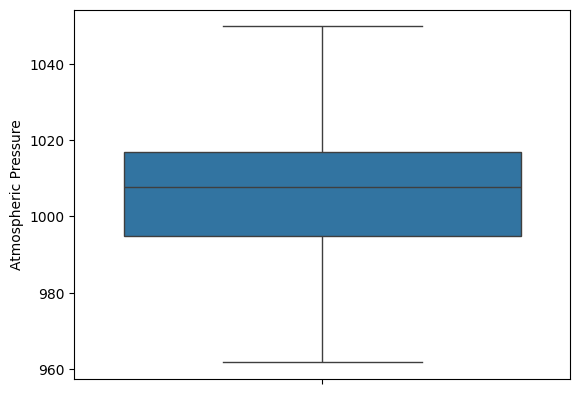

In [15]:
sns.boxplot(df['Atmospheric Pressure'])

<Axes: ylabel='Temperature'>

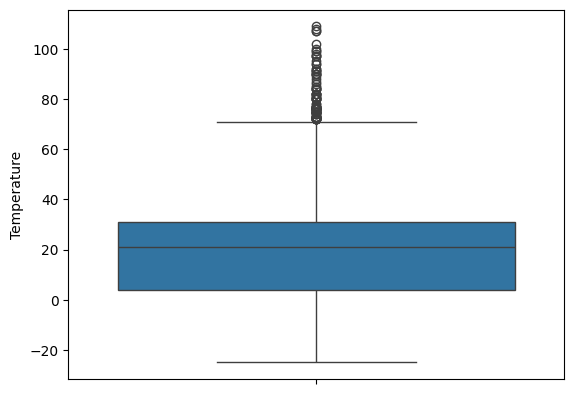

In [16]:
# Check the outliers of Temperature variable
sns.boxplot(df['Temperature'])

In [17]:
# Calculate the 25th and 75th percentiles
percentile25 = df['Temperature'].quantile(0.25)
print("25th Percentile :", percentile25)

percentile75 = df['Temperature'].quantile(0.75)
print("75th Percentile :", percentile75)

# Calculate the interquartile range (IQR)
IQR = percentile75 - percentile25

# Define the upper and lower limits
upper_limit = percentile75 + 1.5 * IQR
print('Upper limit :',upper_limit)

lower_limit = percentile25 - 1.5 * IQR
print('Lower limit :',lower_limit)

# Create a copy of the DataFrame
new_df = df.copy()

# Capping the outliers
new_df['Temperature'] = np.where(
    new_df['Temperature'] > upper_limit, upper_limit,
    np.where(new_df['Temperature'] < lower_limit, lower_limit, new_df['Temperature'])
)

# Display the first few rows of the new DataFrame to check the changes
print(new_df.head())

25th Percentile : 4.0
75th Percentile : 31.0
Upper limit : 71.5
Lower limit : -36.5
   Temperature  Humidity  Wind Speed    Cloud Cover  Atmospheric Pressure  \
0         14.0        73         9.5  partly cloudy               1010.82   
1         39.0        96         8.5  partly cloudy               1011.43   
2         30.0        64         7.0          clear               1018.72   
3         38.0        83         1.5          clear               1026.25   
4         27.0        74        17.0       overcast                990.67   

   Season  Location Weather Type  
0  Winter    inland        Rainy  
1  Spring    inland       Cloudy  
2  Spring  mountain        Sunny  
3  Spring   coastal        Sunny  
4  Winter  mountain        Rainy  


In [18]:
df = new_df.copy()

<Axes: ylabel='Temperature'>

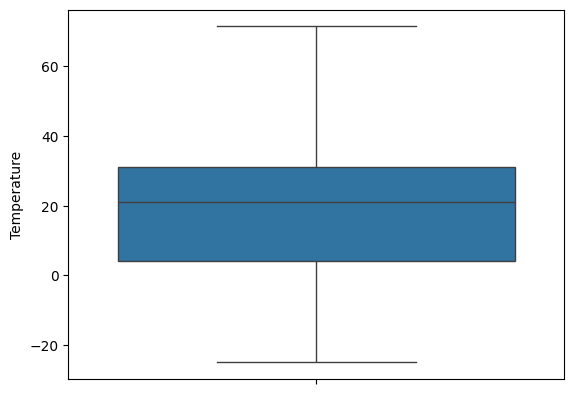

In [19]:
sns.boxplot(df['Temperature'])

<Axes: ylabel='Humidity'>

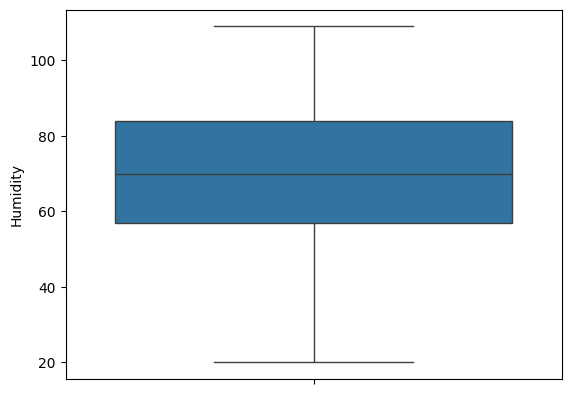

In [20]:
# In the Humidity, there were no any outliers
sns.boxplot(df['Humidity'])

<Axes: ylabel='Wind Speed'>

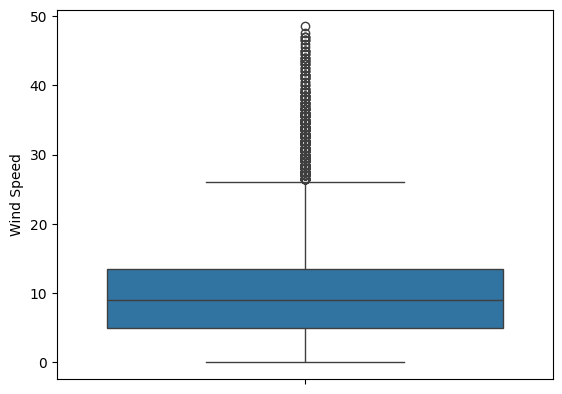

In [21]:
# Check the outliers of Wind Speed variable
sns.boxplot(df['Wind Speed'])

In [22]:
# Calculate the 25th and 75th percentiles
percentile25 = df['Wind Speed'].quantile(0.25)
print("25th Percentile :", percentile25)

percentile75 = df['Wind Speed'].quantile(0.75)
print("75th Percentile :", percentile75)

# Calculate the interquartile range (IQR)
IQR = percentile75 - percentile25

# Define the upper and lower limits
upper_limit = percentile75 + 1.5 * IQR
print('Upper limit :',upper_limit)

lower_limit = percentile25 - 1.5 * IQR
print('Lower limit :',lower_limit)

# Create a copy of the DataFrame
new_df = df.copy()

# Capping the outliers
new_df['Wind Speed'] = np.where(
    new_df['Wind Speed'] > upper_limit, upper_limit,
    np.where(new_df['Wind Speed'] < lower_limit, lower_limit, new_df['Wind Speed'])
)

# Display the first few rows of the new DataFrame to check the changes
print(new_df.head())

25th Percentile : 5.0
75th Percentile : 13.5
Upper limit : 26.25
Lower limit : -7.75
   Temperature  Humidity  Wind Speed    Cloud Cover  Atmospheric Pressure  \
0         14.0        73         9.5  partly cloudy               1010.82   
1         39.0        96         8.5  partly cloudy               1011.43   
2         30.0        64         7.0          clear               1018.72   
3         38.0        83         1.5          clear               1026.25   
4         27.0        74        17.0       overcast                990.67   

   Season  Location Weather Type  
0  Winter    inland        Rainy  
1  Spring    inland       Cloudy  
2  Spring  mountain        Sunny  
3  Spring   coastal        Sunny  
4  Winter  mountain        Rainy  


In [23]:
df = new_df.copy()

<Axes: ylabel='Wind Speed'>

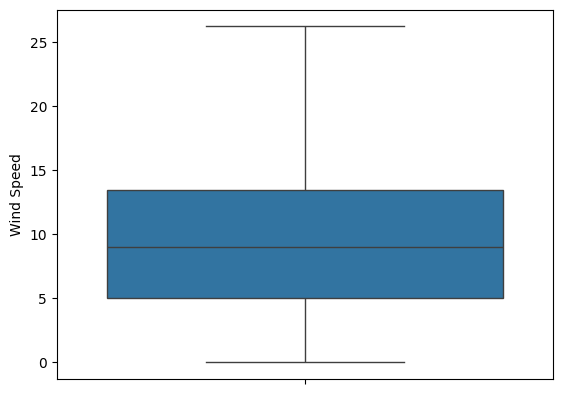

In [24]:
sns.boxplot(df['Wind Speed'])

In [25]:
df.head()

,Temperature,Humidity,Wind Speed,Cloud Cover,Atmospheric Pressure,Season,Location,Weather Type
0,14.0,73,9.5,partly cloudy,1010.82,Winter,inland,Rainy
1,39.0,96,8.5,partly cloudy,1011.43,Spring,inland,Cloudy
2,30.0,64,7.0,clear,1018.72,Spring,mountain,Sunny
3,38.0,83,1.5,clear,1026.25,Spring,coastal,Sunny
4,27.0,74,17.0,overcast,990.67,Winter,mountain,Rainy


**Logistic Regression**

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

In [27]:
# response variable and exploratory variables
X = df.drop(columns = ['Weather Type'])
y = df['Weather Type']

In [28]:
# Specify the categorical column names, excluding the target column
categorical_features = ['Cloud Cover', 'Season', 'Location']

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Step 1: ColumnTransformer with OneHotEncoder
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), categorical_features)
], remainder='passthrough')


# Step 2: Logistic Regression
step2 = LogisticRegression(max_iter=1000)  # Adding max_iter to ensure convergence

# Create the pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])


# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(X_test)

# Print classification metrics
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1 Score:', f1_score(y_test, y_pred, average='weighted'))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 0.7875
Precision: 0.7860530216844476
Recall: 0.7875
F1 Score: 0.786358035294


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**78.75% accurately predict the weather type in particular location using the Logistic Regression.**

**Decision Tree**

In [31]:
# load the required packages
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [32]:
# response variable and exploratory variables
X = df.drop(columns = ['Weather Type'])
y = df['Weather Type']

In [33]:
# Specify the categorical column names, excluding the target column
categorical_features = ['Cloud Cover', 'Season', 'Location']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Step 1: ColumnTransformer with OneHotEncoder
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), categorical_features)
], remainder='passthrough')

# Step 2: Decision Tree Classifier
step2 = DecisionTreeClassifier(random_state=42)

# Create the pipeline
pipeline_dt = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline on the training data
pipeline_dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = pipeline_dt.predict(X_test)

# Print accuracy
print('Decision Tree Classifier Accuracy:', accuracy_score(y_test, y_pred_dt))

Decision Tree Classifier Accuracy: 0.8212121212121212


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**82.12% accurately predict the weather type in particular location using the Decision tree classifier.**

**Random Forest**

In [35]:
# required packages

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [36]:
# response variable and exploratory variables
X = df.drop(columns = ['Weather Type'])
y = df['Weather Type']

In [37]:
# Specify the categorical column names, excluding the target column
categorical_features = ['Cloud Cover', 'Season', 'Location']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Step 1: ColumnTransformer with OneHotEncoder
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), categorical_features)
], remainder='passthrough')

# Step 2: Random Forest Classifier
step2 = RandomForestClassifier(random_state=42)

# Create the pipeline
pipeline_rf = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline on the training data
pipeline_rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = pipeline_rf.predict(X_test)

# Print accuracy
print('Random Forest Classifier Accuracy:', accuracy_score(y_test, y_pred_rf))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Random Forest Classifier Accuracy: 0.8609848484848485


**86.09% accurately predict the weather type in particular location using the Random Forest classifier**

**KNN**

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [44]:
# Assuming df is your DataFrame and 'target' is your target column
X = df.drop(columns=['Weather Type'])
y = df['Weather Type']

In [45]:
# Specify the categorical column names, excluding the target column
categorical_features = ['Cloud Cover', 'Season', 'Location']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Step 1: ColumnTransformer with OneHotEncoder for categorical features and StandardScaler for numeric features
step1 = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(sparse=False, drop='first'), categorical_features),
    ('num', StandardScaler(), X.select_dtypes(include='number').columns.tolist())
], remainder='passthrough')

# Step 2: KNeighbors Classifier
step2 = KNeighborsClassifier()

# Create the pipeline
pipeline_knn = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline on the training data
pipeline_knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = pipeline_knn.predict(X_test)

# Print accuracy
print('KNeighbors Classifier Accuracy:', accuracy_score(y_test, y_pred_knn))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


KNeighbors Classifier Accuracy: 0.8208333333333333


**82.08% accurately predict the weather type in particular location using the KNeighbors Classifier**

**Support Vector Classifier**

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [50]:
# Assuming df is your DataFrame and 'target' is your target column
X = df.drop(columns=['Weather Type'])
y = df['Weather Type']

In [51]:
# Specify the categorical column names, excluding the target column
categorical_features = ['Cloud Cover', 'Season', 'Location']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Step 1: ColumnTransformer with OneHotEncoder for categorical features and StandardScaler for numeric features
step1 = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(sparse=False, drop='first'), categorical_features),
    ('num', StandardScaler(), X.select_dtypes(include='number').columns.tolist())
], remainder='passthrough')

# Step 2: Support Vector Classifier (SVC)
step2 = SVC()

# Create the pipeline
pipeline_svc = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline on the training data
pipeline_svc.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svc = pipeline_svc.predict(X_test)

# Print accuracy
print('SVC Accuracy:', accuracy_score(y_test, y_pred_svc))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


SVC Accuracy: 0.8473484848484848


**84.73% accurately predict the weather type in particular location using the Support Vector Classifier**

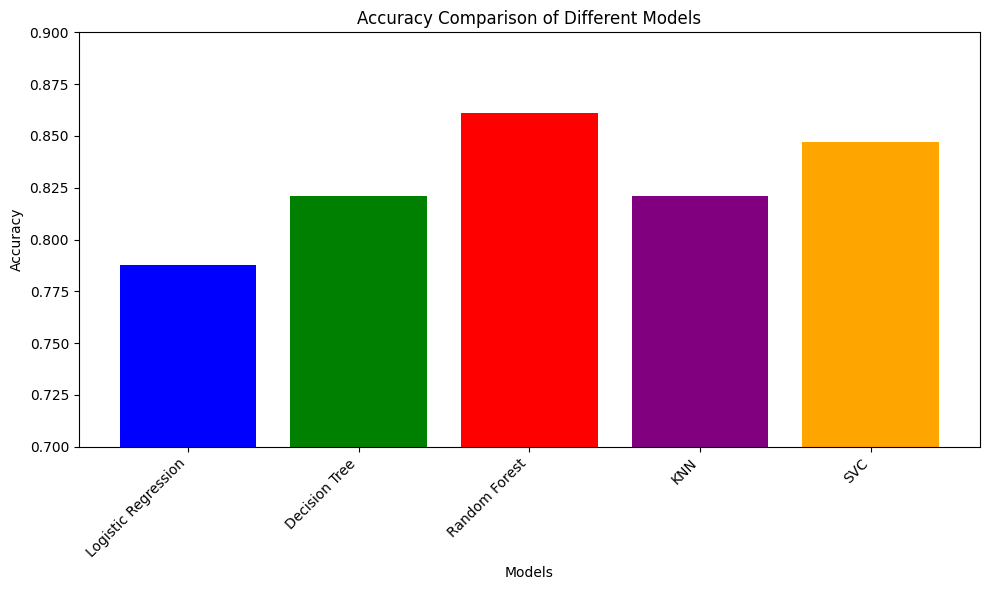

In [54]:

# List of model names and their accuracies
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVC']
accuracies = [0.7875, 0.8212, 0.8609, 0.8208, 0.8473]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0.7, 0.9)  # Set y-axis limits for better visualization
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


In [56]:
# List of model names and their accuracies
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVC']
accuracies = [0.7875, 0.8212, 0.8609, 0.8208, 0.8473]

# Find the index of the model with the highest accuracy
best_model_index = accuracies.index(max(accuracies))

# Print the best model and its accuracy
print("The best model is:", models[best_model_index])
print("Accuracy:", accuracies[best_model_index])


The best model is: Random Forest
Accuracy: 0.8609


***According to the accuracy scores of all the fitted model, we can conclude that the best model is Random Forest Classifier with the acuracy of 86.09%***